<a href="https://colab.research.google.com/github/agord1994/MLA_ASG/blob/main/MLA4_ASG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Machine Learning Assignment-4 #  
**Andrew Gordon**  

## Standard Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook. 

In [ ]:
from sklearn import tree
from sklearn.tree import export_text

## Imports for Splitting Data and Building Pipeline


In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [ ]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

# ROC_Curve Function
This function is for plotting the roc_curve

In [ ]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

## Problem 1

### Reading the Data

In [ ]:
df= pd.read_csv('/content/gdrive/MyDrive/CS430/banknote_authentication.csv')

### Statistical and Visual Exploration

### Splitting Data into Train/Test

In [ ]:
X=df[['variance','skewness','curtosis','entropy']]

In [ ]:
y=df['forgery']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=.2,random_state=0)

### Building the Pipeline

In [ ]:
num_attribs= ['variance','skewness','curtosis','entropy']

col_transform=ColumnTransformer(transformers=[('num',MinMaxScaler(),num_attribs)])

In [ ]:
pipeline=Pipeline([('trans',col_transform), 
                   ('decision_tree',tree.DecisionTreeClassifier(max_depth=5))
                   ]) 

### Executing the Model

In [ ]:
pipeline.fit(X_train,np.ravel(y_train))

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  ['variance', 'skewness',
                                                   'curtosis', 'entropy'])])),
                ('decision_tree', DecisionTreeClassifier(max_depth=5))])

### Evaluating Model

In [ ]:
y_pred=pipeline.predict(X_test)

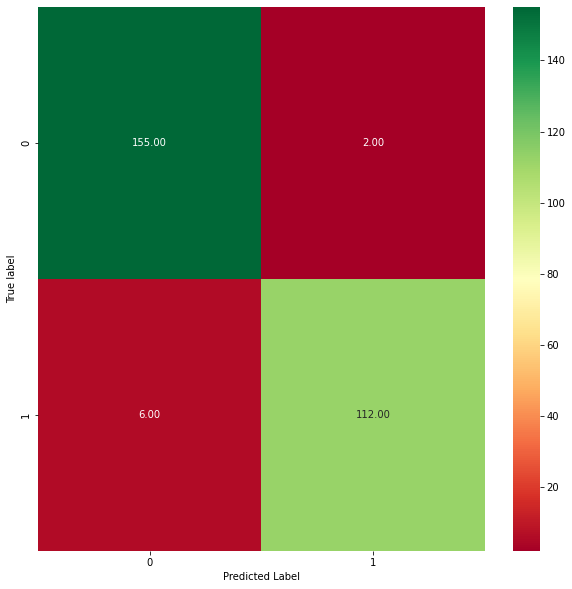

In [ ]:
plot_cm(y_test,y_pred)

In [ ]:
print("Precision:",precision_score(y_test,y_pred))
print("Recall:", recall_score(y_test,y_pred))
print("F1 Score:", f1_score(y_test,y_pred))

Precision: 0.9824561403508771
Recall: 0.9491525423728814
F1 Score: 0.9655172413793103


After Examining the confusion matrix there are only 8 instance where the model predicts the wrong outcome. The false negatives are the highest classification of instances with 6. Overall, the precision and recall scores are relatively high and show that this is a good predictive model.

### Conclusion
Examining the F1 score we can see that the model is 96% accurate in determining if the bank note is a forgery or not. If we use the variables 'variance','skewness','curtosis','entropy' we can predict with a relatively high accuracy if the banknote will be forged or not. 

## Problem 2

In [ ]:
df= pd.read_csv('/content/gdrive/MyDrive/CS430/Steel_industry_data.csv')

In [ ]:
df=df.rename(columns={ 'Usage_kWh': 'usage_kwh','Lagging_Current_Reactive.Power_kVarh': 'lag_react_pwr_kvarh','Leading_Current_Reactive_Power_kVarh': 'lead_react_pwr_kvrah','Lagging_Current_Power_Factor': 'lag_current_pwr','Leading_Current_Power_Factor': 'lead_current_pwr','NSM': 'nsm','WeekStatus': 'week_status','Day_of_week': 'day_of_week','Load_Type':'load_type'})

### Splitting Data into Train/Test

In [ ]:
X=df[['lag_react_pwr_kvarh','lead_react_pwr_kvrah','CO2(tCO2)','lag_current_pwr','lead_current_pwr','nsm','week_status','day_of_week','load_type']] #putting variables into X data frame
y=df['usage_kwh']# putting usage_kwh into y data frame- this is variable we are trying to predict

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=.2,random_state=0)

### Building the Pipeline

In [ ]:
num_attribs= ['lag_react_pwr_kvarh','lead_react_pwr_kvrah','CO2(tCO2)','lag_current_pwr','lead_current_pwr','nsm']
cat_attribs= ['week_status','day_of_week','load_type']

In [ ]:
col_transform=ColumnTransformer(transformers=[('cat',OneHotEncoder(),cat_attribs),('num',MinMaxScaler(),num_attribs)], remainder="passthrough")

In [ ]:
pipeline=Pipeline([('trans',col_transform), 
                   ('decision_tree',tree.DecisionTreeRegressor(max_depth=5))
                   ]) 

### Executing the Model

In [ ]:
pipeline.fit(X_train,np.ravel(y_train))

Pipeline(steps=[('trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  ['week_status', 'day_of_week',
                                                   'load_type']),
                                                 ('num', MinMaxScaler(),
                                                  ['lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvrah',
                                                   'CO2(tCO2)',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr',
                                                   'nsm'])])),
                ('decision_tree', DecisionTreeRegressor(max_depth=5))])

### Evaluating Model

In [ ]:
y_pred=pipeline.predict(X_test)

In [ ]:
y_train_pred= pipeline.predict(X_train)


In [ ]:
print(mean_squared_error(y_train,y_train_pred)**(.5))
print(mean_squared_error(y_test,y_pred)**(.5))


3.542070006212088
3.5799826364650333


The mean squared error between the test and training data are relatively consistent. The low mean square error represents that the predicted values fit the data set. 

### Conclusion
RSME shows this model is a good fit, because if we take a look at the instances in the column we are trying to predict (kwh usage), the values in this column have a very high range. 0 - 157.18. 